# Práctica 2
---
### Ejercicio 1: Aproximación a derivadas e integrales

Aproximemos a la función $\frac{1}{x}$ en el intervalo $[1,2]$ con polinomios de Taylor de orden $n$ con $n \in \{0,1,2\}$ con centro en $x_0=1.5$. Los polinomios de Taylor son:

$$P_0(x) = f(x_0) = \frac{2}{3} \quad \text{(constante)}$$
$$P_1(x) = f(x_0) + f^{(1)}(x_0)(x-x_0) = \frac{2}{3} - \frac{1}{x_0^2}(x-x_0) \quad \text{(lineal)}$$
$$P_2(x) = f(x_0) + f^{(1)}(x_0)(x-x_0) + \frac{f^{(2)}(x_0)(x-x_0)^2}{2} = \frac{2}{3} - \frac{1}{x_0^2}(x-x_0) + \frac{2}{x_0^3}(x-x_0)^2 \quad \text{(cuadrático)}$$


##### Graficar la función y los polinomios constante, lineal y cuadrático en una sola gráfica con matplotlib en el intervalo [1,2]. 


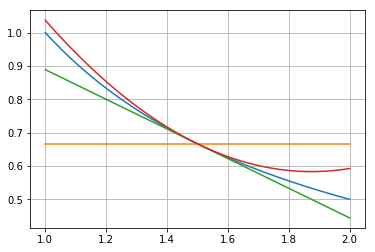

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def base_function(x):
    return 1/x

#ponemos un argumento aunque no lo usemos para poder utilizar la función map() más adelante
def taylor_polynomial_0(x_0):
    return 2/3

def taylor_polynomial_1(x_0, x):
    return taylor_polynomial_0(x_0) - ((1/(x_0**2))*(x - x_0))

def taylor_polynomial_2(x_0, x):
    return taylor_polynomial_1(x_0,x) + ((2/(x_0**3))*((x-x_0)**2))

x = 1.9
x0 = 1.5

x_values = np.linspace(1,2,100)    #rango de 1 a 2 con 100 números (el intervalo es [1,2] en este ejercicio)

#obtener valores de eje verticial con la funciñon f(x)
y_values_base_function = list(map(base_function, x_values))

#obtener valores del eje vertical con la función P0(x)
y_values_tay_pol_0 = list(map(taylor_polynomial_0, x_values))

#obtener valores del eje vertical con la función P1(x)
y_values_tay_pol_1 = list(map(taylor_polynomial_1, [1.5]*100, x_values))

#obtener valores del eje vertical con la función P2(x)
y_values_tay_pol_2 = list(map(taylor_polynomial_2, [1.5]*100, x_values))


plt.plot(
    x_values, y_values_base_function,
    x_values, y_values_tay_pol_0,
    x_values, y_values_tay_pol_1,
    x_values, y_values_tay_pol_2
)
plt.grid(True) 
plt.show()


##### ¿Cuánto es la aproximación de los polinomios en x=1.9? Calcula el error relativo de tus aproximaciones.
$$R_n(x) = \frac{f^{(n+1)}(\xi_x)(x-x_0)^{(n+1)}}{(n+1)!}$$

In [21]:
x_0 = 1.5
x = 1.9

aprox_0 = taylor_polynomial_0(x_0)
aprox_1 = taylor_polynomial_1(x_0, x)
aprox_2 = taylor_polynomial_2(x_0, x)

print("P0(x) =", aprox_0)
print("P1(x) =", aprox_1)
print("P2(x) =", aprox_2)

P0(x) = 0.6666666666666666
P1(x) = 0.48888888888888893
P2(x) = 0.5837037037037037


#### Ejercicio: realizar una gráfica de log(error relativo) vs log(h) (h en el eje horizontal) para aproximar la segunda derivada de 

$f(x)=e^{-x}$ en $x=1$ con $h \in \{10^{-16}, 10^{-14}, \dots , 10^{-1}\}$ 

#### y diferencias hacia delante. Valor a aproximar: 

$f^{(2)}(1) = e^{-1}$. Usar:

$$\frac{d^2f(x)}{dx} \approx \frac{f(x+2h)-2f(x+h)+f(x)}{h^2}$$

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math

def error_relativo(p, p_ast):
    return np.abs(p - p_ast)/np.abs(p_ast)

def aprox_derivada(f,x,h):
    return (f(x+h) - f(x-h))/(2.0*h)

def aprox_2a_derivada(f,x,h):
    return (f(x+h) - 2.0*f(x) + f(x-h))/h**2

f = lambda x: np.exp(-x)

x=1
aux = np.arange(-16, 0, 1)
h = np.power(10.0, aux)

In [20]:
objetivo_df = -math.exp(-x)
objetivo_dff = math.exp(-x)

In [21]:
df = aprox_derivada(f, x, h)
dff = aprox_2a_derivada(f, x, h)

err_df = error_relativo(df, objetivo_df)
err_dff = error_relativo(dff, objetivo_dff)

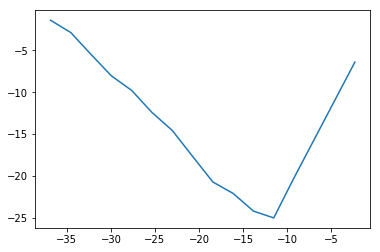

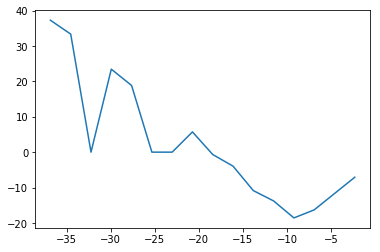

In [22]:
plt.plot(np.log(h), np.log(err_df))
plt.show()
plt.plot(np.log(h), np.log(err_dff))
plt.show()